In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

IMAGES_PATH='.'

def save_fig(fig_id, tight_layout=False, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure embedding_vectors


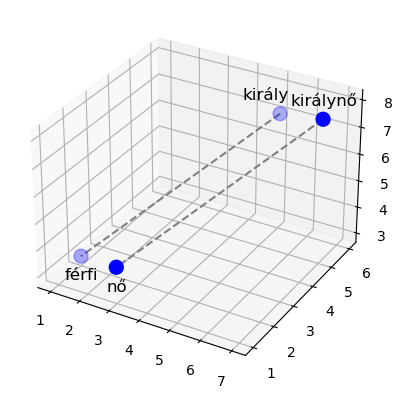

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the coordinates for the points with more space
coordinates = {
    "férfi": (1, 2, 3),
    "nő": (3, 1, 4),
    "király": (5, 6, 7),
    "királynő": (7, 5, 8)
}

# Extract the coordinates and labels
x, y, z = zip(*coordinates.values())
labels = coordinates.keys()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points with more space
ax.scatter(x, y, z, c='blue', marker='o', s=100, label='Embedding Vectors')

# Connect the points with dashed lines
ax.plot([x[3], x[1]], [y[3], y[1]], [z[3], z[1]], linestyle='--', c='gray')
ax.plot([x[2], x[0]], [y[2], y[0]], [z[2], z[0]], linestyle='--', c='gray')

# Label the points
ax.text(x[0], y[0], z[0]-1, list(labels)[0], fontsize=12, ha='center', va='bottom')
ax.text(x[1], y[1], z[1]-1, list(labels)[1], fontsize=12, ha='center', va='bottom')
ax.text(x[2]-.5, y[2], z[2]+.3, list(labels)[2], fontsize=12, ha='center', va='bottom')
ax.text(x[3], y[3], z[3]+.4, list(labels)[3], fontsize=12, ha='center', va='bottom')

save_fig('embedding_vectors', tight_layout=False)
# Show the plot
plt.show()


In [3]:
list(labels)

['férfi', 'nő', 'király', 'királynő']

/home/daniel/anaconda3/lib/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


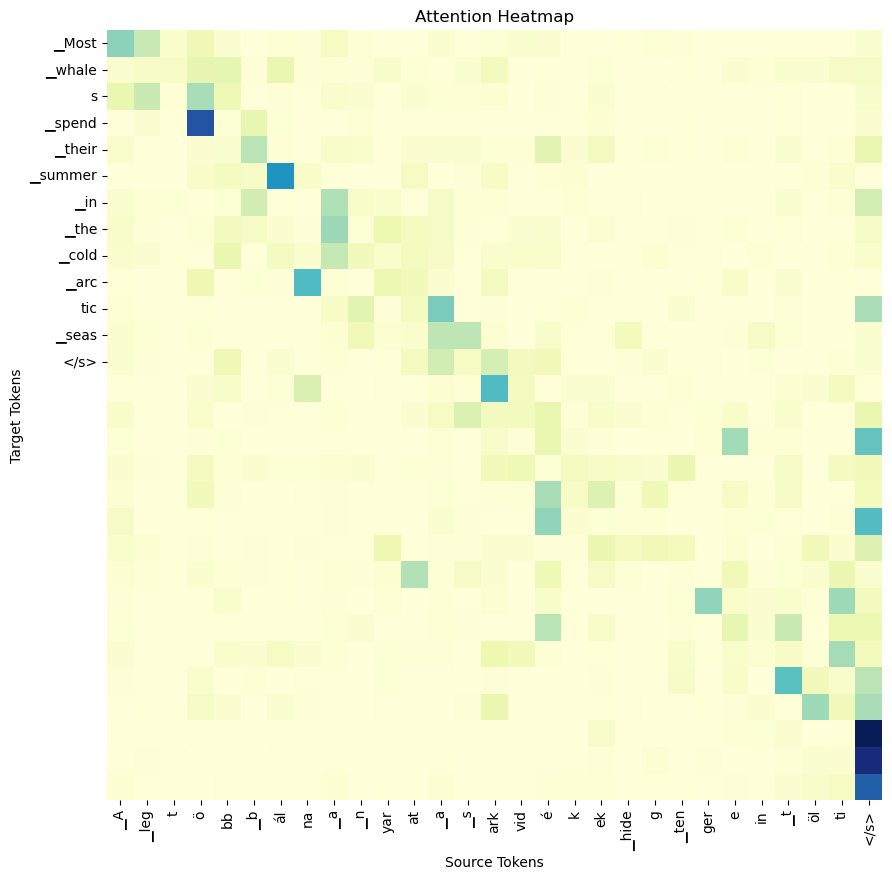

In [21]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import seaborn as sns
import matplotlib.pyplot as plt

# Define the input sentences
src_text = "A legtöbb bálna a nyarat a sarkvidékek hideg tengerein tölti"
tgt_text = "Most whales spend their summer in the cold arctic seas"

# Load the pre-trained translation model
model_name = "Helsinki-NLP/opus-mt-en-hu"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Tokenize the input sentences
src_tokens = tokenizer(src_text, return_tensors="pt", padding=True, truncation=True)
tgt_tokens = tokenizer(tgt_text, return_tensors="pt", padding=True, truncation=True)

# Translate the source sentence to the target language
translation = model.generate(**src_tokens, max_length=128, num_beams=4, no_repeat_ngram_size=3)

# Get the attention weights for a specific layer and head
layer_index = 0  # Change this to the desired layer
head_index = 0  # Change this to the desired head
attn_weights = model.get_encoder()(
    src_tokens["input_ids"],
    return_dict=True,
    output_attentions=True
).attentions[layer_index][0][head_index]

# Define source and target tokens
src_tokens_lst = tokenizer.convert_ids_to_tokens(src_tokens["input_ids"].squeeze().tolist())
tgt_tokens_lst = tokenizer.convert_ids_to_tokens(tgt_tokens["input_ids"].squeeze().tolist())

#src_tokens = src_text.split()
#tgt_tokens = tgt_text.split()

# Plot the attention heatmap with tokens as tick labels
plt.figure(figsize=(10, 10))
sns.heatmap(attn_weights.detach().numpy(), cmap="YlGnBu", xticklabels=src_tokens_lst, yticklabels=tgt_tokens_lst, cbar=False)
plt.xlabel("Source Tokens")
plt.ylabel("Target Tokens")
plt.title("Attention Heatmap")
plt.show()

Saving figure self_attention


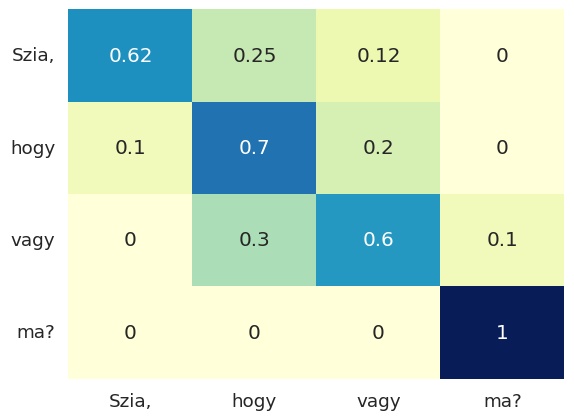

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the sentence tokens
tokens = ["Szia,", "hogy", "vagy", "ma?"]

# Create a 4x4 grid of data (you can replace this with your own data)
data = np.array([
    [5, 2, 1, 0],
    [1, 7, 2, 0],
    [0, 3, 6, 1],
    [0, 0, 0, 8]
])

# Normalize the rows to sum to 1
row_sums = data.sum(axis=1, keepdims=True)
normalized_data = data / row_sums


# Create a Seaborn heatmap
sns.set(font_scale=1.2)  # Adjust the font size as needed
ax = sns.heatmap(normalized_data, annot=True, cmap="YlGnBu", xticklabels=tokens, yticklabels=tokens, cbar=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
save_fig('self_attention')
plt.show()

In [3]:
row_sums

array([[ 8],
       [10],
       [10],
       [ 8]])